## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score,f1_score, roc_auc_score, confusion_matrix, roc_curve,precision_score, recall_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle


In [3]:
df1=pd.read_csv(r'C:\Users\Ayman\Downloads\MIAM\Final_project\student\student-mat.csv',sep=';')
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
df1['Subject']='Math'

In [5]:
df2=pd.read_csv(r'C:\Users\Ayman\Downloads\MIAM\Final_project\student\student-por.csv',sep=';')
df2 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [6]:
df2['Subject']='portugal'
df2 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,portugal
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,portugal
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,portugal
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,portugal
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,portugal
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,portugal
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,portugal
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,portugal


In [7]:
df=pd.concat([df1,df2],axis=0)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,portugal
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,portugal
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,portugal
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,portugal


## Exploring Dataset 

In [8]:
def Explore(df: pd.DataFrame):
    print(" Dataset Info:")
    print("-" * 40)
    print(f"Number of Rows    : {df.shape[0]}")
    print(f"Number of Columns : {df.shape[1]}")
    print("\nColumn Types:")
    print(df.dtypes.value_counts())
    print("-" * 40)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical_cols   = df.select_dtypes(include=['int64','float64']).columns.tolist()
    print(f"\n🔹 Number of Categorical Columns: {len(categorical_cols)}")
    print(f"Categorical Columns: {categorical_cols}")
    print(f"\n🔹 Number of Numerical Columns  : {len(numerical_cols)}")
    print(f"Numerical Columns: {numerical_cols}")
    return {
        "categorical_cols": categorical_cols,
        "numerical_cols": numerical_cols
    }

In [9]:
Explore(df)

 Dataset Info:
----------------------------------------
Number of Rows    : 1044
Number of Columns : 34

Column Types:
object    18
int64     16
Name: count, dtype: int64
----------------------------------------

🔹 Number of Categorical Columns: 18
Categorical Columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'Subject']

🔹 Number of Numerical Columns  : 16
Numerical Columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


{'categorical_cols': ['school',
  'sex',
  'address',
  'famsize',
  'Pstatus',
  'Mjob',
  'Fjob',
  'reason',
  'guardian',
  'schoolsup',
  'famsup',
  'paid',
  'activities',
  'nursery',
  'higher',
  'internet',
  'romantic',
  'Subject'],
 'numerical_cols': ['age',
  'Medu',
  'Fedu',
  'traveltime',
  'studytime',
  'failures',
  'famrel',
  'freetime',
  'goout',
  'Dalc',
  'Walc',
  'health',
  'absences',
  'G1',
  'G2',
  'G3']}

## EDA

In [10]:
def knowing_nulls_duplicate(df):
    null_count=df.isnull().sum().sum()
    if null_count>0:
        for i in df.columns:
            null_col=df[i].isnull().sum()
            if null_col > 0:
                print(f'col {i} has Nulls')
    else:
        print('No Nulls in this DataSet')      
    duplicate_count=df.duplicated().sum()
    if duplicate_count > 0:
        print('there is duplicate in data')
    else:
       print('there is No Duplicate in data')                 

In [11]:
knowing_nulls_duplicate(df)

No Nulls in this DataSet
there is No Duplicate in data


In [12]:
## Descirbe 
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [13]:
## the col in Numeric but in categorical sense except   G1	G2	G3 absences

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

## preprocessing 

In [15]:
for i in df.select_dtypes('object'):
    count=df[i].value_counts()
    print(f'Col {i}\ncount :\n{count}')
    print('-----------------------------------------------')

Col school
count :
school
GP    772
MS    272
Name: count, dtype: int64
-----------------------------------------------
Col sex
count :
sex
F    591
M    453
Name: count, dtype: int64
-----------------------------------------------
Col address
count :
address
U    759
R    285
Name: count, dtype: int64
-----------------------------------------------
Col famsize
count :
famsize
GT3    738
LE3    306
Name: count, dtype: int64
-----------------------------------------------
Col Pstatus
count :
Pstatus
T    923
A    121
Name: count, dtype: int64
-----------------------------------------------
Col Mjob
count :
Mjob
other       399
services    239
at_home     194
teacher     130
health       82
Name: count, dtype: int64
-----------------------------------------------
Col Fjob
count :
Fjob
other       584
services    292
teacher      65
at_home      62
health       41
Name: count, dtype: int64
-----------------------------------------------
Col reason
count :
reason
course        430
home    

In [16]:
enc=LabelEncoder()
for i in df.select_dtypes('object'):
    df[i]=enc.fit_transform(df[i])


In [17]:
## Unique values now is int 
set(df.dtypes.values.tolist())

{dtype('int32'), dtype('int64')}

In [18]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,0
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,0
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,0


In [20]:
corr = df.corr(numeric_only=True)['G3'].sort_values(ascending=False)

corr_df = corr.reset_index()
corr_df.columns = ['Feature', 'Correlation']

fig = px.bar(
    corr_df,
    x='Correlation',
    y='Feature',
    orientation='h',
    text='Correlation',
    color='Correlation',
    color_continuous_scale='RdBu',
    title="Correlation of All Features with Final Grade (G3)"
)

fig.update_traces(
    texttemplate='%{text:.2f}', 
    textposition='outside'
)

fig.update_layout(
    xaxis=dict(title="Correlation with G3"),
    yaxis=dict(title="Features", autorange="reversed"),
    plot_bgcolor="white",
    title_font=dict(size=22),
    font=dict(size=13)
)

fig.show()

**G1,G2 Is Most Features correlaction**

In [21]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Subject'],
      dtype='object')

## Feature Engineering 

In [ ]:
## Extract from best features correlated relation 
df['Averge_G1_G2']=(df['G1']+df['G2'])/2

In [23]:
def classify_risk(grade):
    if grade < 10:
        return "High Risk (Fail <10)"
    elif 10 <= grade <= 13:
        return "Medium Risk (Pass 10–13)"
    else:
        return "Low Risk (Pass 14+)"

# Apply function to create new column
df['G3'] = df['G3'].apply(classify_risk)

In [24]:
df['G3'].value_counts()
## Data is balanced

G3
Medium Risk (Pass 10–13)    520
Low Risk (Pass 14+)         294
High Risk (Fail <10)        230
Name: count, dtype: int64

In [25]:
df=df.iloc[:,0:-1]

In [26]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,High Risk (Fail <10),0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,High Risk (Fail <10),0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,Medium Risk (Pass 10–13),0
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,Low Risk (Pass 14+),0
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,Medium Risk (Pass 10–13),0


## Machie Learning models and Optmization

In [28]:
def logistic_regression_pipeline(df, target_col, k_features=10, save_path="logistic_model.pkl"):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    selector = SelectKBest(score_func=f_classif, k=k_features)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    selected_features = X_train.columns[selector.get_support()]
    print("Selected Features:", list(selected_features))
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l2']
    }
    log_reg = LogisticRegression(max_iter=500, random_state=42, multi_class="auto")
    grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro')
    grid.fit(X_train_selected, y_train)
    best_model = grid.best_estimator_
    print("Best Params:", grid.best_params_)
    y_pred = best_model.predict(X_test_selected)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    with open(save_path, 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Model saved to {save_path}")
    return best_model, selected_features

Selected Features: ['school', 'Medu', 'studytime', 'failures', 'schoolsup', 'higher', 'Dalc', 'G1', 'G2', 'Subject']


c:\Users\Ayman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

c:\Users\Ayman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

c:\Users\Ayman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

c:\Users\Ayman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then 

Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

Classification Report:
                          precision    recall  f1-score   support

    High Risk (Fail <10)       0.87      0.85      0.86        46
     Low Risk (Pass 14+)       0.88      0.86      0.87        59
Medium Risk (Pass 10–13)       0.86      0.88      0.87       104

                accuracy                           0.87       209
               macro avg       0.87      0.86      0.87       209
            weighted avg       0.87      0.87      0.87       209


Confusion Matrix:
 [[39  0  7]
 [ 0 51  8]
 [ 6  7 91]]


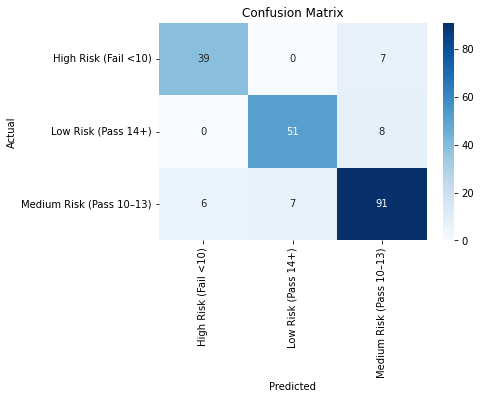

Model saved to logistic_model.pkl


In [29]:
model, features = logistic_regression_pipeline(df, target_col="G3", k_features=10)


In [30]:
features

Index(['school', 'Medu', 'studytime', 'failures', 'schoolsup', 'higher',
       'Dalc', 'G1', 'G2', 'Subject'],
      dtype='object')

In [31]:
def knn_pipeline(df, target_col, k_features=10, save_path="knn_model.pkl"):
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    selector = SelectKBest(score_func=f_classif, k=k_features)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    selected_features = X_train.columns[selector.get_support()]
    print("Selected Features:", list(selected_features))
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
    grid.fit(X_train_selected, y_train)
    best_model = grid.best_estimator_
    print("Best Params:", grid.best_params_)

    y_pred = best_model.predict(X_test_selected)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", 
                xticklabels=best_model.classes_, 
                yticklabels=best_model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - KNN")
    plt.show()

    with open(save_path, 'wb') as file:
        pickle.dump(best_model, file)

    print(f"Model saved to {save_path}")
    return best_model, selected_features

Selected Features: ['school', 'Medu', 'studytime', 'failures', 'schoolsup', 'higher', 'Dalc', 'G1', 'G2', 'Subject']
Best Params: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

Classification Report:
                          precision    recall  f1-score   support

    High Risk (Fail <10)       0.80      0.78      0.79        46
     Low Risk (Pass 14+)       0.92      0.83      0.88        59
Medium Risk (Pass 10–13)       0.82      0.88      0.85       104

                accuracy                           0.84       209
               macro avg       0.85      0.83      0.84       209
            weighted avg       0.85      0.84      0.84       209


Confusion Matrix:
 [[36  0 10]
 [ 0 49 10]
 [ 9  4 91]]


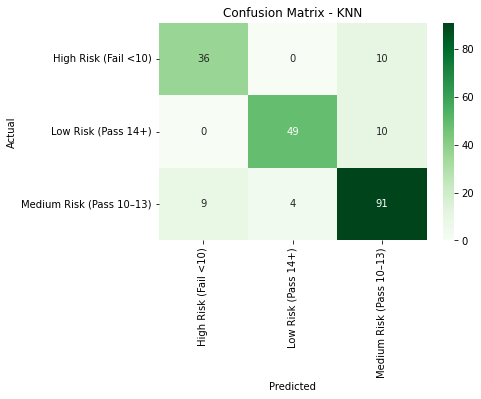

Model saved to knn_model.pkl


In [32]:
model_knn, features_knn = knn_pipeline(df, target_col="G3", k_features=10)


In [33]:
def random_forest_pipeline(df, target_col, k_features=10, save_path="rf_model.pkl"):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    selector = SelectKBest(score_func=f_classif, k=k_features)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    selected_features = X_train.columns[selector.get_support()]
    print("Selected Features:", list(selected_features))
    param_grid = {
        'n_estimators': [100, 200, 300],   
        'max_depth': [None, 5, 10, 20],    
        'min_samples_split': [2, 5, 10],   
        'min_samples_leaf': [1, 2, 4],     
        'bootstrap': [True, False]         
    }
    rf = RandomForestClassifier(random_state=42)
    grid = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train_selected, y_train)
    best_model = grid.best_estimator_
    print("Best Params:", grid.best_params_)
    y_pred = best_model.predict(X_test_selected)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", 
                xticklabels=best_model.classes_, 
                yticklabels=best_model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Random Forest")
    plt.show()
    with open(save_path, 'wb') as file:
        pickle.dump(best_model, file)

    print(f"Model saved to {save_path}")
    return best_model, selected_features

Selected Features: ['school', 'Medu', 'studytime', 'failures', 'schoolsup', 'higher', 'Dalc', 'G1', 'G2', 'Subject']
Best Params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Classification Report:
                          precision    recall  f1-score   support

    High Risk (Fail <10)       0.86      0.78      0.82        46
     Low Risk (Pass 14+)       0.92      0.81      0.86        59
Medium Risk (Pass 10–13)       0.82      0.90      0.86       104

                accuracy                           0.85       209
               macro avg       0.87      0.83      0.85       209
            weighted avg       0.86      0.85      0.85       209


Confusion Matrix:
 [[36  0 10]
 [ 0 48 11]
 [ 6  4 94]]


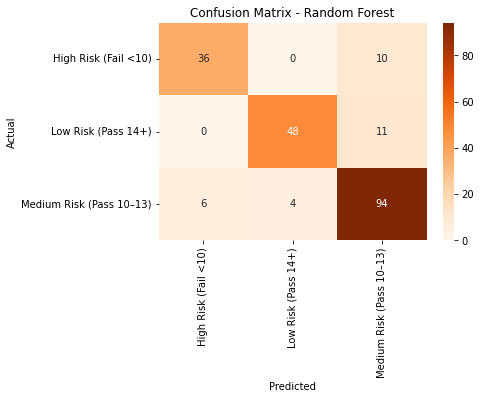

Model saved to rf_model.pkl


In [34]:
model_random_forest, features_random_forest = random_forest_pipeline(df, target_col="G3", k_features=10)


In [35]:
def svm_pipeline(df, target_col, k_features=10, save_path="svm_model.pkl"):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    selector = SelectKBest(score_func=f_classif, k=k_features)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    selected_features = X_train.columns[selector.get_support()]
    print("Selected Features:", list(selected_features))
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_test_scaled = scaler.transform(X_test_selected)
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
    svm = SVC(probability=True, random_state=42)
    grid = GridSearchCV(svm, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    print("Best Params:", grid.best_params_)
    y_pred = best_model.predict(X_test_scaled)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=best_model.classes_, 
                yticklabels=best_model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - SVM")
    plt.show()
    with open(save_path, 'wb') as file:
        pickle.dump(best_model, file)

    print(f"Model saved to {save_path}")
    return best_model, selected_features


Selected Features: ['school', 'Medu', 'studytime', 'failures', 'schoolsup', 'higher', 'Dalc', 'G1', 'G2', 'Subject']
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report:
                          precision    recall  f1-score   support

    High Risk (Fail <10)       0.87      0.85      0.86        46
     Low Risk (Pass 14+)       0.91      0.81      0.86        59
Medium Risk (Pass 10–13)       0.84      0.89      0.87       104

                accuracy                           0.86       209
               macro avg       0.87      0.85      0.86       209
            weighted avg       0.86      0.86      0.86       209


Confusion Matrix:
 [[39  0  7]
 [ 0 48 11]
 [ 6  5 93]]


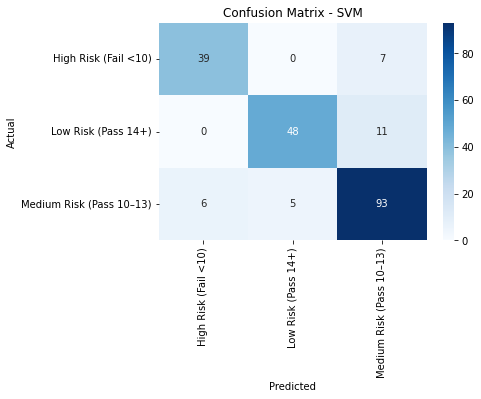

Model saved to svm_model.pkl


In [36]:
model_SVM, features_SVM = svm_pipeline(df, target_col="G3", k_features=10)


In [37]:
def decision_tree_pipeline(df, target_col, k_features=10, save_path="decision_tree_model.pkl"):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    selector = SelectKBest(score_func=f_classif, k=k_features)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    selected_features = X_train.columns[selector.get_support()]
    print("Selected Features:", list(selected_features))
    param_grid = {
        'criterion': ['gini', 'entropy'],   
        'max_depth': [None, 5, 10, 20],     
        'min_samples_split': [2, 5, 10],    
        'min_samples_leaf': [1, 2, 4]       
    }
    dt = DecisionTreeClassifier(random_state=42)
    grid = GridSearchCV(dt, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train_selected, y_train)
    best_model = grid.best_estimator_
    print("Best Params:", grid.best_params_)
    y_pred = best_model.predict(X_test_selected)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", 
                xticklabels=best_model.classes_, 
                yticklabels=best_model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Decision Tree")
    plt.show()
    with open(save_path, 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Model saved to {save_path}")
    return best_model, selected_features

Selected Features: ['school', 'Medu', 'studytime', 'failures', 'schoolsup', 'higher', 'Dalc', 'G1', 'G2', 'Subject']
Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

Classification Report:
                          precision    recall  f1-score   support

    High Risk (Fail <10)       0.78      0.87      0.82        46
     Low Risk (Pass 14+)       0.89      0.81      0.85        59
Medium Risk (Pass 10–13)       0.84      0.84      0.84       104

                accuracy                           0.84       209
               macro avg       0.84      0.84      0.84       209
            weighted avg       0.84      0.84      0.84       209


Confusion Matrix:
 [[40  0  6]
 [ 0 48 11]
 [11  6 87]]


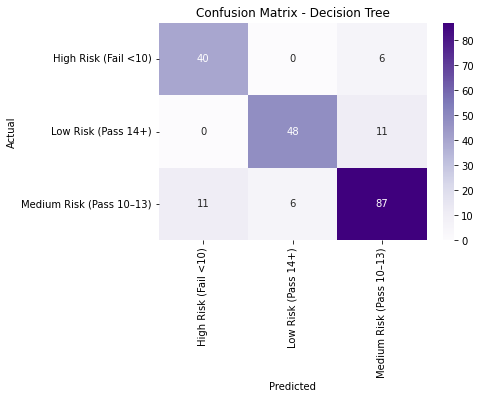

Model saved to decision_tree_model.pkl


In [38]:
model_Decision_tree, features_Decision_tree = decision_tree_pipeline(df, target_col="G3", k_features=10)


In [39]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,High Risk (Fail <10),0
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,High Risk (Fail <10),0
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,Medium Risk (Pass 10–13),0
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,Low Risk (Pass 14+),0
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,Medium Risk (Pass 10–13),0


In [40]:
features 

Index(['school', 'Medu', 'studytime', 'failures', 'schoolsup', 'higher',
       'Dalc', 'G1', 'G2', 'Subject'],
      dtype='object')

In [41]:
df['Student_rate_G1_G2']=(df['G2']-df['G1'])

In [42]:
def classify(x):
    if x>0:
        return 1
    else:
        return 0 

In [43]:
df['Student_rate_G1_G2']=df['Student_rate_G1_G2'].apply(classify)

In [66]:
features

Index(['Medu', 'studytime', 'failures', 'schoolsup', 'higher', 'Dalc', 'G1',
       'G2', 'Subject', 'Averge_G1_G2'],
      dtype='object')

In [49]:
df['Averge_rate']=(df['G1']+df['G2'])/2

In [50]:
def logistic_regression_pipeline(df, target_col, save_path="logistic_model_Random_feature_select.pkl"):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    best_score = 0
    best_k = None
    best_features = None
    best_model = None
    for k in range(5, X.shape[1] + 1):  
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)

        selected_features = X_train.columns[selector.get_support()]
        param_grid = {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs'],
            'penalty': ['l2']
        }
        log_reg = LogisticRegression(max_iter=500, random_state=42, multi_class="auto")
        grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')  # نستخدم accuracy أو f1_macro
        grid.fit(X_train_selected, y_train)
        model = grid.best_estimator_
        y_pred = model.predict(X_test_selected)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_score:
            best_score = acc
            best_k = k
            best_features = selected_features
            best_model = model
    print(f"✅ Best k: {best_k}")
    print(f"✅ Best Accuracy: {best_score:.4f}")
    print("Selected Features:", list(best_features))
    X_train_selected = SelectKBest(score_func=f_classif, k=best_k).fit_transform(X_train, y_train)
    X_test_selected = SelectKBest(score_func=f_classif, k=best_k).fit(X_train, y_train).transform(X_test)
    y_pred = best_model.predict(X_test_selected)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=best_model.classes_, 
                yticklabels=best_model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Logistic Regression")
    plt.show()
    with open(save_path, 'wb') as file:
        pickle.dump(best_model, file)

    print(f"Model saved to {save_path}")
    return best_model, best_features

In [54]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,Subject,Student_rate_G1_G2,Averge_rate
0,0,0,18,1,0,0,4,4,0,4,...,1,1,3,6,5,6,High Risk (Fail <10),0,1,5.5
1,0,0,17,1,0,1,1,1,0,2,...,1,1,3,4,5,5,High Risk (Fail <10),0,0,5.0
2,0,0,15,1,1,1,1,1,0,2,...,2,3,3,10,7,8,Medium Risk (Pass 10–13),0,1,7.5
3,0,0,15,1,0,1,4,2,1,3,...,1,1,5,2,15,14,Low Risk (Pass 14+),0,0,14.5
4,0,0,16,1,0,1,3,3,2,2,...,1,2,5,4,6,10,Medium Risk (Pass 10–13),0,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,1,2,5,4,10,11,Medium Risk (Pass 10–13),1,1,10.5
645,1,0,18,1,1,1,3,1,4,3,...,1,1,1,4,15,15,Low Risk (Pass 14+),1,0,15.0
646,1,0,18,1,0,1,1,1,2,2,...,1,1,5,6,11,12,High Risk (Fail <10),1,1,11.5
647,1,1,17,1,1,1,3,1,3,3,...,3,4,2,6,10,10,Medium Risk (Pass 10–13),1,0,10.0


c:\Users\Ayman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

c:\Users\Ayman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

c:\Users\Ayman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

c:\Users\Ayman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then 

✅ Best k: 14
✅ Best Accuracy: 0.8756
Selected Features: ['school', 'Medu', 'Fedu', 'reason', 'studytime', 'failures', 'schoolsup', 'higher', 'Dalc', 'Walc', 'G1', 'G2', 'Subject', 'Averge_rate']

Classification Report:
                          precision    recall  f1-score   support

    High Risk (Fail <10)       0.89      0.85      0.87        46
     Low Risk (Pass 14+)       0.89      0.86      0.88        59
Medium Risk (Pass 10–13)       0.86      0.89      0.88       104

                accuracy                           0.88       209
               macro avg       0.88      0.87      0.87       209
            weighted avg       0.88      0.88      0.88       209


Confusion Matrix:
 [[39  0  7]
 [ 0 51  8]
 [ 5  6 93]]


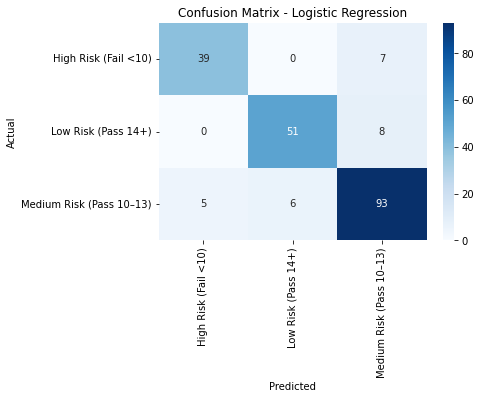

Model saved to logistic_model_Random_feature_select.pkl


In [51]:
model_new_Logistic, features_new_Logistic = logistic_regression_pipeline(df, target_col="G3")


In [58]:
def random_forest_pipeline(df, target_col, save_path="rf_model_Random_feature_select.pkl"):
    X = df.drop(columns=target_col)
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    best_score = 0
    best_k = None
    best_features = None
    best_model = None
    for k in range(5, X.shape[1] + 1):  
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)

        selected_features = X_train.columns[selector.get_support()]
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'bootstrap': [True, False]
        }

        rf = RandomForestClassifier(random_state=42)
        grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_selected, y_train)

        model = grid.best_estimator_
        y_pred = model.predict(X_test_selected)
        acc = accuracy_score(y_test, y_pred)

        if acc > best_score:
            best_score = acc
            best_k = k
            best_features = selected_features
            best_model = model

    print(f"✅ Best k: {best_k}")
    print(f"✅ Best Accuracy: {best_score:.4f}")
    print("Selected Features:", list(best_features))
    selector = SelectKBest(score_func=f_classif, k=best_k).fit(X_train, y_train)
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
    y_pred = best_model.predict(X_test_selected)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:\n", cm)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", 
                xticklabels=best_model.classes_, 
                yticklabels=best_model.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Random Forest")
    plt.show()

    with open(save_path, 'wb') as file:
        pickle.dump(best_model, file)

    print(f"Model saved to {save_path}")
    return best_model, best_features

In [59]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,Subject,Student_rate_G1_G2,Averge_rate
0,0,0,18,1,0,0,4,4,0,4,...,1,1,3,6,5,6,High Risk (Fail <10),0,1,5.5
1,0,0,17,1,0,1,1,1,0,2,...,1,1,3,4,5,5,High Risk (Fail <10),0,0,5.0
2,0,0,15,1,1,1,1,1,0,2,...,2,3,3,10,7,8,Medium Risk (Pass 10–13),0,1,7.5
3,0,0,15,1,0,1,4,2,1,3,...,1,1,5,2,15,14,Low Risk (Pass 14+),0,0,14.5
4,0,0,16,1,0,1,3,3,2,2,...,1,2,5,4,6,10,Medium Risk (Pass 10–13),0,1,8.0


✅ Best k: 5
✅ Best Accuracy: 0.8708
Selected Features: ['failures', 'higher', 'G1', 'G2', 'Averge_rate']

Classification Report:
                          precision    recall  f1-score   support

    High Risk (Fail <10)       0.90      0.78      0.84        46
     Low Risk (Pass 14+)       0.96      0.81      0.88        59
Medium Risk (Pass 10–13)       0.82      0.94      0.88       104

                accuracy                           0.87       209
               macro avg       0.89      0.85      0.87       209
            weighted avg       0.88      0.87      0.87       209


Confusion Matrix:
 [[36  0 10]
 [ 0 48 11]
 [ 4  2 98]]


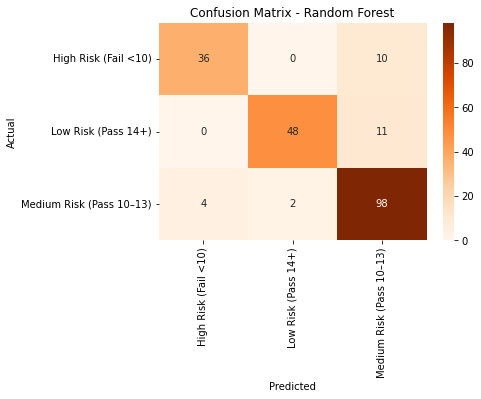

Model saved to rf_model_Random_feature_select.pkl


In [60]:
model_new_Random, features_new_random = random_forest_pipeline(df, target_col="G3")


**Best Model of Machine Learning Model is Logistic Regression and there is no need to use Min Max Scailing**

## Deep Learning 


In [69]:
## I will use best Features on deep learning model features_new_Logistic

In [70]:
features_new_Logistic

Index(['school', 'Medu', 'Fedu', 'reason', 'studytime', 'failures',
       'schoolsup', 'higher', 'Dalc', 'Walc', 'G1', 'G2', 'Subject',
       'Averge_rate'],
      dtype='object')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


def deep_learning_model(df, target_col, features, save_path="deep_learning_model.h5"):
    X = df[features]
    y = df[target_col]

    if y.dtype == "object" or str(y.dtype).startswith("category"):
        le = LabelEncoder()
        y = le.fit_transform(y)
        print("✅ Classes:", list(le.classes_))
    else:
        le = None

    num_classes = len(np.unique(y))
    if num_classes > 2:
        y = to_categorical(y)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y if num_classes <= 2 else None
    )

    model = Sequential()
    model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.3))

    if num_classes > 2:
        model.add(Dense(num_classes, activation="softmax"))
        loss_fn = "categorical_crossentropy"
    else:
        model.add(Dense(1, activation="sigmoid"))
        loss_fn = "binary_crossentropy"

    model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

    # 🔹 Early stopping
    es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

    # 🔹 Train model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        verbose=1,
        callbacks=[es]
    )

    # 🔹 Evaluate
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    print(f"\n✅ Train Accuracy: {train_acc:.4f}")
    print(f"✅ Test Accuracy: {test_acc:.4f}")

    # 🔹 Predictions for report
    y_pred_probs = model.predict(X_test)

    if num_classes > 2:
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true = np.argmax(y_test, axis=1)
    else:
        y_pred = (y_pred_probs > 0.5).astype(int).ravel()
        y_true = y_test

    print("\n📊 Classification Report:")
    if le:
        print(classification_report(y_true, y_pred, target_names=le.classes_))
    else:
        print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Deep Learning Model")
    plt.show()

    plt.figure(figsize=(12,5))

    # Loss curve
    plt.subplot(1,2,1)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.legend()

    plt.show()

    model.save(save_path)
    print(f"💾 Model saved to {save_path}")

    return model, history, scaler

✅ Classes: ['High Risk (Fail <10)', 'Low Risk (Pass 14+)', 'Medium Risk (Pass 10–13)']
Epoch 1/100


C:\Users\Ayman\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4159 - loss: 1.0901 - val_accuracy: 0.7066 - val_loss: 0.7814
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6803 - loss: 0.7795 - val_accuracy: 0.7904 - val_loss: 0.5915
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.6266 - val_accuracy: 0.8323 - val_loss: 0.4880
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8043 - loss: 0.5204 - val_accuracy: 0.8204 - val_loss: 0.4385
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8035 - loss: 0.4678 - val_accuracy: 0.8144 - val_loss: 0.4166
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8157 - loss: 0.4578 - val_accuracy: 0.8323 - val_loss: 0.4057
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8296 - loss: 0.4056 - val_accuracy: 0.8024 - val_loss: 0.3912
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8178 - loss: 0.4190 - val_accuracy: 0.8144 - val_loss: 0.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

📊 Classification Report:
                          precision    recall  f1-score   support

    High Risk (Fail <10)       0.86      0.73      0.79        60
     Low Risk (Pass 14+)       0.88      0.85      0.87        54
Medium Risk (Pass 10–13)       0.77      0.86      0.82        95

                accuracy                           0.82       209
               macro avg       0.84      0.82      0.83       209
            weighted avg       0.83      0.82      0.82       209



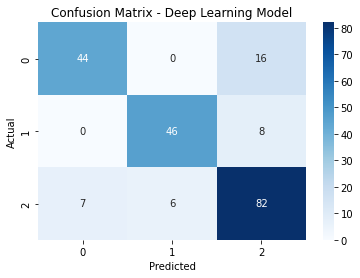

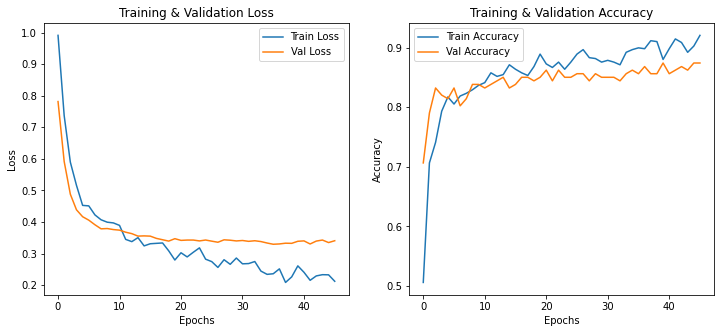

💾 Model saved to deep_learning_model.h5


In [77]:
model_neruron,history,scaler=deep_learning_model(df,'G3',features_new_Logistic.tolist())

In [81]:
cols = [col for col in df.columns.tolist() if col != 'G3']

✅ Classes: ['High Risk (Fail <10)', 'Low Risk (Pass 14+)', 'Medium Risk (Pass 10–13)']


C:\Users\Ayman\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3346 - loss: 1.2076 - val_accuracy: 0.5030 - val_loss: 0.9622
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5917 - loss: 0.9039 - val_accuracy: 0.6766 - val_loss: 0.7741
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6815 - loss: 0.7331 - val_accuracy: 0.7365 - val_loss: 0.6337
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7531 - loss: 0.6244 - val_accuracy: 0.7844 - val_loss: 0.5466
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8064 - loss: 0.5459 - val_accuracy: 0.8084 - val_loss: 0.4855
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8112 - loss: 0.4677 - val_accuracy: 0.8144 - val_loss: 0.4472
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8325 - loss: 0.4388 - val_accuracy: 0.8263 - val_loss: 0.4244
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7843 - loss: 0.4567 - val_accuracy: 0.8204 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

📊 Classification Report:
                          precision    recall  f1-score   support

    High Risk (Fail <10)       0.82      0.75      0.78        60
     Low Risk (Pass 14+)       0.90      0.85      0.88        54
Medium Risk (Pass 10–13)       0.78      0.84      0.81        95

                accuracy                           0.82       209
               macro avg       0.83      0.81      0.82       209
            weighted avg       0.82      0.82      0.82       209



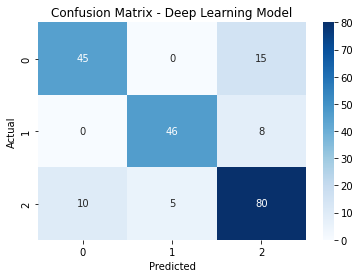

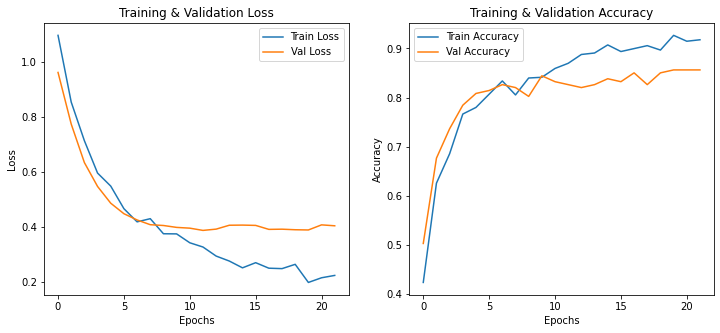

💾 Model saved to deep_learning_model.h5


In [82]:
model_neruron,history,scaler=deep_learning_model(df,'G3',cols)

In [85]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

features = ['school', 'Medu', 'Fedu', 'reason', 'studytime', 'failures',
            'schoolsup', 'higher', 'Dalc', 'Walc', 'G1', 'G2', 'Subject',
            'Averge_rate']

X = df[features].copy()
y = df['G3'].copy()   

for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

base_model = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation="softmax")
])

base_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


base_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


for layer in base_model.layers[:2]:
    layer.trainable = False

base_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
mc = ModelCheckpoint("best_finetuned_model.h5", save_best_only=True)

history = base_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[es, mc],
    verbose=1
)

train_acc = base_model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = base_model.evaluate(X_test, y_test, verbose=0)[1]

print(f"✅ Train Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy: {test_acc:.4f}")

Epoch 1/20


C:\Users\Ayman\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4012 - loss: 1.5525 - val_accuracy: 0.6826 - val_loss: 0.8622
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6208 - loss: 0.8671 - val_accuracy: 0.7305 - val_loss: 0.7598
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6796 - loss: 0.7498 - val_accuracy: 0.7605 - val_loss: 0.6931
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7270 - loss: 0.7070 - val_accuracy: 0.7844 - val_loss: 0.6365
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7696 - loss: 0.5263 - val_accuracy: 0.7904 - val_loss: 0.5853
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7852 - loss: 0.5256 - val_accuracy: 0.7904 - val_loss: 0.5392
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7943 - loss: 0.4983 - val_accuracy: 0.7844 - val_loss: 0.5080
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7957 - loss: 0.4686 - val_accuracy: 0.7844 - val_loss: 0.4836
E

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8384 - loss: 0.3506 - val_accuracy: 0.8443 - val_loss: 0.4022
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8611 - loss: 0.3462 - val_accuracy: 0.8383 - val_loss: 0.4036
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8320 - loss: 0.3894 - val_accuracy: 0.8443 - val_loss: 0.4170
Epoch 4/50
13/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8707 - loss: 0.3276 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8692 - loss: 0.3241 - val_accuracy: 0.8383 - val_loss: 0.3942
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8702 - loss: 0.3206 - val_accuracy: 0.8443 - val_loss: 0.3959
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8749 - loss: 0.3114 - val_accuracy: 0.8503 - val_loss: 0.4038
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8683 - loss: 0.3078 - val_accuracy: 0.8443 - val_loss: 0.4041
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8577 - loss: 0.3108 - val_accuracy: 0.8443 - val_loss: 0.4058
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8781 - loss: 0.3165 - val_accuracy: 0.8503 - val_loss: 0.4095
✅ Train Accuracy: 0.9126
✅ Test Accuracy: 0.8517


In [ ]:
y_pred = np.argmax(base_model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        46
           1       0.89      0.85      0.87        59
           2       0.82      0.89      0.86       104

    accuracy                           0.85       209
   macro avg       0.86      0.83      0.85       209
weighted avg       0.85      0.85      0.85       209



## Sentiement Analysis 

In [ ]:
import pandas as pd

# 60 positive feedbacks
positive_feedbacks = [
    "I understood the material very well",
    "The teacher explained concepts clearly",
    "I feel confident about the exams",
    "I enjoyed studying for this subject",
    "The course was very informative",
    "I was able to solve problems easily",
    "The lectures were engaging",
    "The study materials were helpful",
    "I could follow all topics without difficulty",
    "I am satisfied with my preparation",
    "I feel prepared for the next exam",
    "The assignments reinforced my learning",
    "I found the exercises very useful",
    "The course improved my knowledge",
    "I liked the way topics were presented",
    "I understood all the examples",
    "The teacher answered all questions",
    "I enjoyed group discussions",
    "The explanations were clear",
    "I found the content interesting",
    "I am confident in my answers",
    "I enjoyed the quizzes",
    "I improved my problem-solving skills",
    "The course was very practical",
    "I feel motivated to study more",
    "The exams matched the material taught",
    "I liked the feedback on assignments",
    "I am satisfied with my performance",
    "I feel confident in this subject",
    "The resources provided were enough",
    "I could revise easily",
    "The teacher provided good examples",
    "The course met my expectations",
    "I enjoyed the learning process",
    "I felt prepared for each lesson",
    "I liked the pace of the lectures",
    "The study guide was useful",
    "I feel my skills improved",
    "The teacher clarified all doubts",
    "I enjoyed solving past papers",
    "The topics were easy to understand",
    "The assignments helped me learn",
    "I felt supported in my learning",
    "I liked the structure of the course",
    "I feel confident about exams",
    "I can apply what I learned",
    "I enjoyed the interactive sessions",
    "The explanations were simple",
    "I liked the examples given",
    "I feel prepared for final exam",
    "The course was well organized",
    "I enjoyed learning new things",
    "I feel capable in this subject",
    "The teacher was very helpful",
    "I can solve problems efficiently",
    "The material was clear and concise",
    "I liked the assignments",
    "I feel ready for exams",
    "The lectures were motivating",
    "I understood all concepts",
]

# 50 negative feedbacks
negative_feedbacks = [
    "The material was confusing",
    "I didn't understand the lectures",
    "The exams were too difficult",
    "I feel unprepared",
    "I struggled to complete assignments",
    "The course was not helpful",
    "The topics were unclear",
    "I didn't understand the examples",
    "The teacher didn't explain well",
    "I found the assignments too hard",
    "I feel stressed about exams",
    "The course was poorly organized",
    "I couldn't follow the lectures",
    "I feel lost in this subject",
    "The exams were unfair",
    "I am disappointed with the course",
    "The lectures were boring",
    "I didn't learn much",
    "I am struggling with assignments",
    "The feedback was not helpful",
    "I couldn't understand the material",
    "The teacher was not clear",
    "I feel anxious about exams",
    "I didn't enjoy the course",
    "The content was too difficult",
    "I felt unsupported",
    "The lectures were confusing",
    "I couldn't keep up with lessons",
    "I didn't understand the instructions",
    "I feel frustrated",
    "The assignments were overwhelming",
    "I feel my performance is low",
    "The topics were not explained",
    "I am not confident for exams",
    "The course was not informative",
    "I felt lost in assignments",
    "I couldn't solve the problems",
    "The explanations were unclear",
    "I struggled to understand topics",
    "The teacher rushed the lessons",
    "I feel underprepared",
    "The content was overwhelming",
    "The course was not practical",
    "I didn't enjoy learning",
    "I am worried about my grades",
    "I felt confused during lessons",
    "The teacher didn't provide examples",
    "I found the subject difficult",
    "I feel unmotivated",
    "The lectures didn't help",
]

# Combine into DataFrame
feedbacks = positive_feedbacks + negative_feedbacks
exam_degrees = [80 + i % 20 for i in range(60)] + [40 + i % 25 for i in range(50)]  # sample degrees

df_feedback = pd.DataFrame({
    "feedback": feedbacks,
    "exam_degree": exam_degrees
})




                                 feedback  exam_degree
0     I understood the material very well           80
1  The teacher explained concepts clearly           81
2        I feel confident about the exams           82
3     I enjoyed studying for this subject           83
4         The course was very informative           84
(110, 2)


In [90]:
df_feedback

,feedback,exam_degree
0,I understood the material very well,80
1,The teacher explained concepts clearly,81
2,I feel confident about the exams,82
3,I enjoyed studying for this subject,83
4,The course was very informative,84
...,...,...
105,I felt confused during lessons,60
106,The teacher didn't provide examples,61
107,I found the subject difficult,62
108,I feel unmotivated,63


In [112]:
df_feedback

,feedback,exam_degree
0,I understood the material very well,80
1,The teacher explained concepts clearly,81
2,I feel confident about the exams,82
3,I enjoyed studying for this subject,83
4,The course was very informative,84
...,...,...
105,I felt confused during lessons,60
106,The teacher didn't provide examples,61
107,I found the subject difficult,62
108,I feel unmotivated,63


In [115]:
from textblob import TextBlob


In [116]:
classification=[]
for text in df_feedback['feedback'].values.tolist():
    sent=TextBlob(text)
    score=sent.sentiment.polarity
    if score >0:
        classification.append('Positive')
    else:
        classification.append('Negative')



    

In [117]:
classification

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',

In [118]:
df_feedback['Sentiement']=classification

In [122]:
df_feedback[df_feedback['Sentiement']=='Negative']

,feedback,exam_degree,Sentiement
7,The study materials were helpful,87,Negative
8,I could follow all topics without difficulty,88,Negative
10,I feel prepared for the next exam,90,Negative
11,The assignments reinforced my learning,91,Negative
13,The course improved my knowledge,93,Negative
...,...,...,...
105,I felt confused during lessons,60,Negative
106,The teacher didn't provide examples,61,Negative
107,I found the subject difficult,62,Negative
108,I feel unmotivated,63,Negative


In [128]:
df_feedback.loc[df_feedback['exam_degree']>=80,'Sentiement']='Positive'

In [131]:
df_feedback.loc[df_feedback['Sentiement']=='Negative']

,feedback,exam_degree,Sentiement
60,The material was confusing,40,Negative
61,I didn't understand the lectures,41,Negative
62,The exams were too difficult,42,Negative
63,I feel unprepared,43,Negative
65,The course was not helpful,45,Negative
66,The topics were unclear,46,Negative
67,I didn't understand the examples,47,Negative
68,The teacher didn't explain well,48,Negative
69,I found the assignments too hard,49,Negative
70,I feel stressed about exams,50,Negative


In [141]:
df_feedback.loc[df_feedback['exam_degree']==56,'Sentiement']='Negative'

In [ ]:
## Knoiwng if there correlation between High Degress and sentiement or No ?


In [ ]:
fig_box = px.box(
    df_feedback,
    x='Sentiement',
    y='exam_degree',
    color='Sentiement',
    points='all',  
    notched=True,
    color_discrete_map={'Positive':'#2ca02c', 'Negative':'#d62728'},
    title="Exam Degree vs Sentiment",
    template="plotly_white"
)

fig_box.update_layout(
    title_font_size=26,
    xaxis_title="Sentiment",
    yaxis_title="Exam Degree",
    font=dict(family="Arial", size=14),
    plot_bgcolor='rgba(245,245,245,1)',
    paper_bgcolor='rgba(245,245,245,1)',
    boxmode='group'
)
fig_box.show()

x = df_feedback['exam_degree']
y = df_feedback['exam_degree'] + np.random.normal(0,3,len(df_feedback))  
coeffs = np.polyfit(x, y, 1)
line = np.poly1d(coeffs)

fig_scatter = px.scatter(
    df_feedback,
    x='exam_degree',
    y=y,
    color='Sentiement',
    color_discrete_map={'Positive':'#2ca02c', 'Negative':'#d62728'},
    title="Linear Regression of Exam Degree",
    template="plotly_white"
)

fig_scatter.add_traces(
    go.Scatter(
        x=x,
        y=line(x),
        mode='lines',
        line=dict(color='blue', width=4),
        name='Linear Regression'
    )
)

fig_scatter.update_layout(
    title_font_size=26,
    xaxis_title="Exam Degree",
    yaxis_title="Exam Degree (with variation)",
    font=dict(family="Arial", size=14),
    plot_bgcolor='rgba(245,245,245,1)',
    paper_bgcolor='rgba(245,245,245,1)'
)
fig_scatter.show()

In [151]:
## yes there is relation between sentiement and score if sentiement positive degress is tend to be high and negative sentiement tend to be with low degree


In [154]:
## Outleirs of sentiement As seen Above must be treated 
df_feedback.loc[df_feedback['exam_degree']<65,'Sentiement']='Negative'

In [155]:
fig_box = px.box(
    df_feedback,
    x='Sentiement',
    y='exam_degree',
    color='Sentiement',
    points='all',  
    notched=True,
    color_discrete_map={'Positive':'#2ca02c', 'Negative':'#d62728'},
    title="Exam Degree vs Sentiment",
    template="plotly_white"
)

fig_box.update_layout(
    title_font_size=26,
    xaxis_title="Sentiment",
    yaxis_title="Exam Degree",
    font=dict(family="Arial", size=14),
    plot_bgcolor='rgba(245,245,245,1)',
    paper_bgcolor='rgba(245,245,245,1)',
    boxmode='group'
)
fig_box.show()

x = df_feedback['exam_degree']
y = df_feedback['exam_degree'] + np.random.normal(0,3,len(df_feedback))  
coeffs = np.polyfit(x, y, 1)
line = np.poly1d(coeffs)

fig_scatter = px.scatter(
    df_feedback,
    x='exam_degree',
    y=y,
    color='Sentiement',
    color_discrete_map={'Positive':'#2ca02c', 'Negative':'#d62728'},
    title="Linear Regression of Exam Degree",
    template="plotly_white"
)

fig_scatter.add_traces(
    go.Scatter(
        x=x,
        y=line(x),
        mode='lines',
        line=dict(color='blue', width=4),
        name='Linear Regression'
    )
)

fig_scatter.update_layout(
    title_font_size=26,
    xaxis_title="Exam Degree",
    yaxis_title="Exam Degree (with variation)",
    font=dict(family="Arial", size=14),
    plot_bgcolor='rgba(245,245,245,1)',
    paper_bgcolor='rgba(245,245,245,1)'
)
fig_scatter.show()

In [156]:
## Second way of Sentiement Analysis 

## BERT

In [157]:
!pip install transformers torch


In [159]:
from transformers import pipeline


In [160]:
sentiement_model=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

c:\Users\Ayman\anaconda3\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Ayman\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

In [162]:
results = sentiement_model(df_feedback['feedback'].values.tolist())


In [167]:
results[0]['label']

'POSITIVE'

In [170]:
list_sent=[]
for i in range(len(df_feedback)):
    list_sent.append(results[i]['label'])


In [171]:
list_sent

['POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',
 'NEGATIVE',

In [172]:
df_feedback['Sentiement_Bert']=list_sent

In [180]:
df_feedback

,feedback,exam_degree,Sentiement,Sentiement_Bert
0,I understood the material very well,80,Positive,POSITIVE
1,The teacher explained concepts clearly,81,Positive,POSITIVE
2,I feel confident about the exams,82,Positive,POSITIVE
3,I enjoyed studying for this subject,83,Positive,POSITIVE
4,The course was very informative,84,Positive,POSITIVE
...,...,...,...,...
105,I felt confused during lessons,60,Negative,NEGATIVE
106,The teacher didn't provide examples,61,Negative,NEGATIVE
107,I found the subject difficult,62,Negative,NEGATIVE
108,I feel unmotivated,63,Negative,NEGATIVE


In [179]:
df_feedback[df_feedback['Sentiement']==df_feedback['Sentiement_Bert'].str.lower().str.capitalize()]

,feedback,exam_degree,Sentiement,Sentiement_Bert
0,I understood the material very well,80,Positive,POSITIVE
1,The teacher explained concepts clearly,81,Positive,POSITIVE
2,I feel confident about the exams,82,Positive,POSITIVE
3,I enjoyed studying for this subject,83,Positive,POSITIVE
4,The course was very informative,84,Positive,POSITIVE
...,...,...,...,...
105,I felt confused during lessons,60,Negative,NEGATIVE
106,The teacher didn't provide examples,61,Negative,NEGATIVE
107,I found the subject difficult,62,Negative,NEGATIVE
108,I feel unmotivated,63,Negative,NEGATIVE


In [181]:
## Now Bert is Better 

In [9]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


## Ethics in AI

In [10]:
df['sex'].value_counts()

sex
F    591
M    453
Name: count, dtype: int64

**No Any Bias**

## Ensure anonymization

In [12]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Subject'],
      dtype='object')

**No Any Names of Students** 